In [1]:
# display inline plots
%matplotlib inline

# import libraries for numerical and scientific computing
import numpy as np

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import pandas for data wrangling and munging
import pandas as pd

# set some options for better view
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# import plotting library built on top of matplotlib
import seaborn as sns

# set some settings related to style of plots that will render
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from utils import load_data_set, lowercase_column_names

In [3]:
train, test = load_data_set()
train, test = lowercase_column_names(train, test)

Loading datasets
Set ID as index


## Shape of the datasets

In [4]:
print 'Training data set {} and Test data set {}'.format(train.shape, test.shape)

Training data set (3998, 37) and Test data set (1500, 37)


## Pipeline

In [5]:
from features import FeatureTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Features and Target variable

In [44]:
from sklearn.cross_validation import train_test_split

In [45]:
X = train[train.columns.drop('salary')]
y = train.salary

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

## Linear Regression

In [47]:
ft = FeatureTransformer(train, test)
scaler = StandardScaler()
lm = LinearRegression()

In [48]:
pipeline = Pipeline([('transformer', ft), ('scaler', scaler), ('lm', lm)])

In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer', FeatureTransformer(test=None, train=None)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [50]:
lm_comp = pipeline.get_params()['lm']

In [51]:
print 'Estimated intercept coefficient:', lm_comp.intercept_

Estimated intercept coefficient: 306946.216385


In [52]:
print 'Number of coefficients:', len(lm_comp.coef_)

Number of coefficients: 31


In [53]:
feature_names = pipeline.get_params()['transformer'].get_feature_names()

In [54]:
# The coefficients
pd.DataFrame(zip(feature_names, lm_comp.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,year_of_birth,-19595.011581
1,jobcity,-56.190538
2,gender,8372.133209
3,degree,-10022.043294
4,specialization,-3225.447343
5,collegestate,-368.159681
6,10percentage,14973.208503
7,12graduation,-24304.507701
8,12percentage,24133.474008
9,collegeid,-5112.630944


In [55]:
# lets take a look at first five predicted values
pipeline.predict(X_train)[0:5]

array([ 277449.51023055,  377985.49158337,  299906.92530403,
        457427.78190383,  203686.59968057])

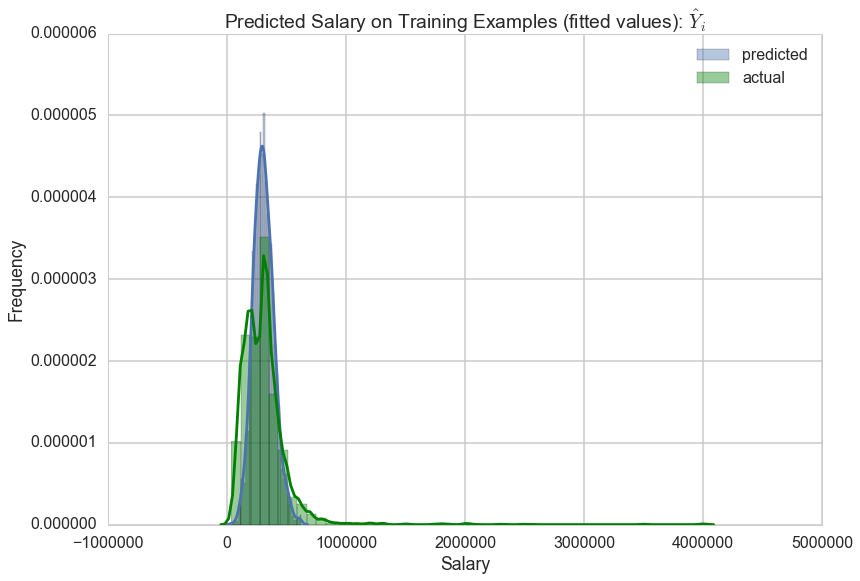

In [56]:
sns.distplot(pipeline.predict(X_train), label='predicted')
sns.distplot(y_train, color='g', label='actual')
plt.title('Predicted Salary on Training Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

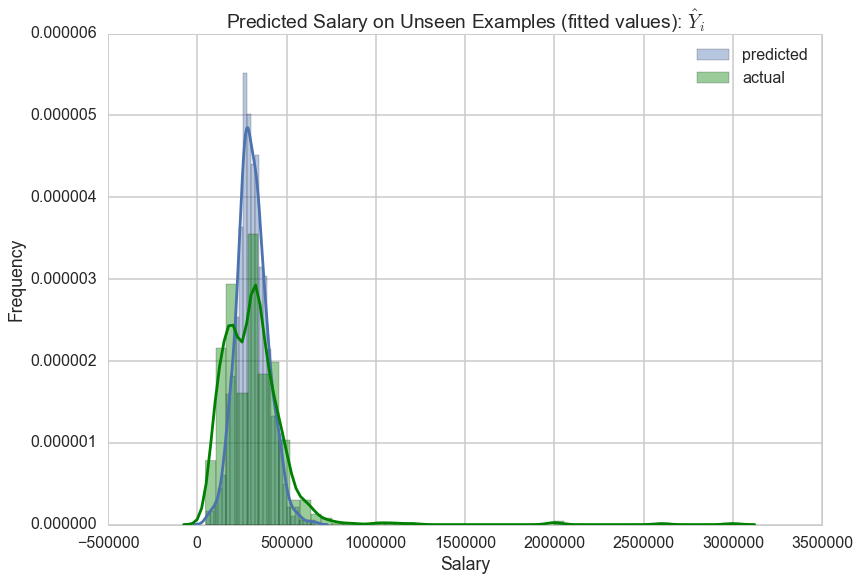

In [57]:
sns.distplot(pipeline.predict(X_test), label='predicted')
sns.distplot(y_test, color='g', label='actual')
plt.title('Predicted Salary on Unseen Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

In [63]:
pred_comparison_train = pd.DataFrame(zip(y_train, pipeline.predict(X_train)), columns=['actual', 'predicted'])

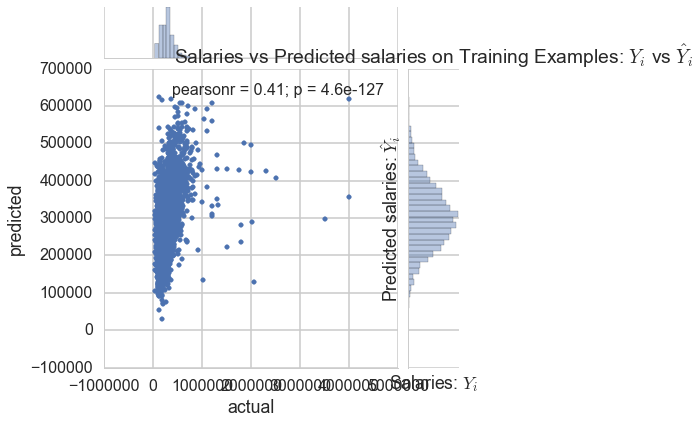

In [62]:
sns.jointplot(x='actual', y='predicted', data=pred_comparison_train)
plt.xlabel("Salaries: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted salaries on Training Examples: $Y_i$ vs $\hat{Y}_i$");

In [64]:
pred_comparison_test = pd.DataFrame(zip(y_test, pipeline.predict(X_test)), columns=['actual', 'predicted'])

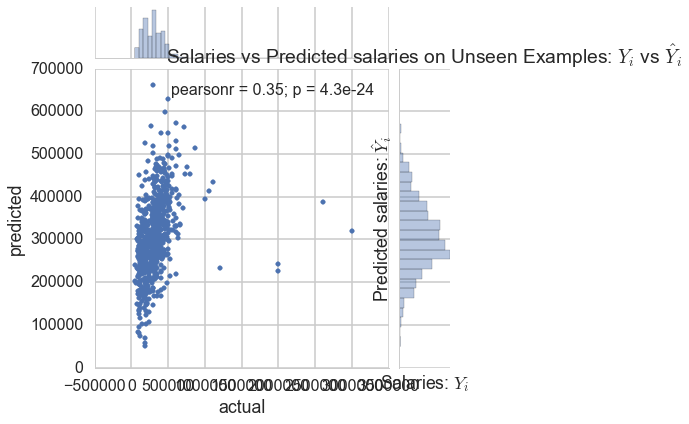

In [65]:
sns.jointplot(x='actual', y='predicted', data=pred_comparison_test)
plt.xlabel("Salaries: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted salaries on Unseen Examples: $Y_i$ vs $\hat{Y}_i$");

In [66]:
mseTrain = np.mean((y_train - pipeline.predict(X_train)) ** 2)
mseTest = np.mean((y_test - pipeline.predict(X_test)) ** 2)

print 'Mean Squared Error on training examples %f ' %mseTrain
print 'Mean Squared Error on unseen examples %f ' %mseTest

Mean Squared Error on training examples 38095995654.325333 
Mean Squared Error on unseen examples 38749504854.230164 


## Random Forest Regression

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [117]:
ft = FeatureTransformer(train, test)
scaler = StandardScaler()
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [118]:
pipeline = Pipeline([('transformer', ft), ('scaler', scaler), ('sel', sel), ('rf', rf)])

In [119]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer', FeatureTransformer(test=None, train=None)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sel', VarianceThreshold(threshold=0.16)), ('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_...mators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [120]:
rf_comp = pipeline.get_params()['rf']

In [121]:
# Feature Importance
feat_importances = pd.DataFrame(zip(feature_names, rf_comp.feature_importances_), columns = ['features', 'importance'])

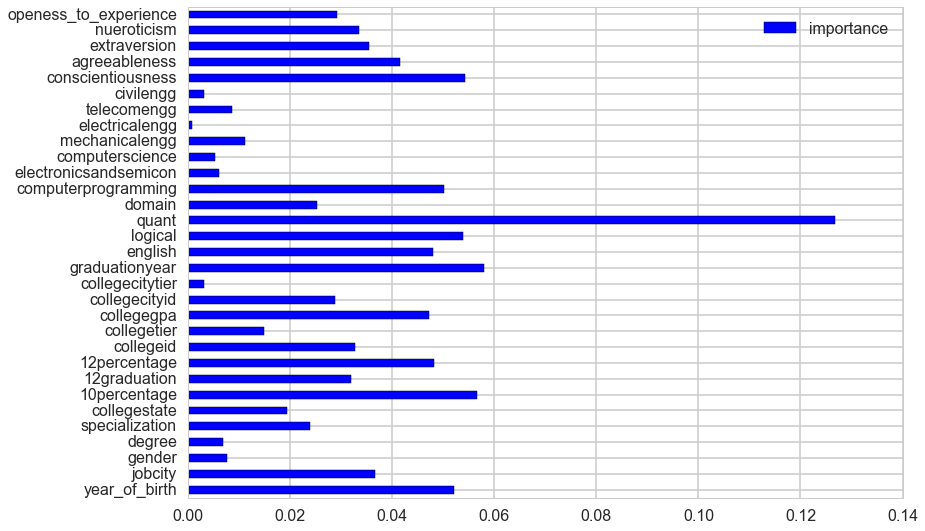

In [122]:
feat_importances.plot(kind='barh')
plt.yticks(feat_importances.index.values, feat_importances.features, rotation='horizontal');

In [123]:
predsTrain = pipeline.predict(X_train)
predsTest = pipeline.predict(X_test)

In [124]:
# lets take a look at first five predicted values
predsTrain[0:5]

array([ 293700.,  139300.,  362750.,  335150.,  133500.])

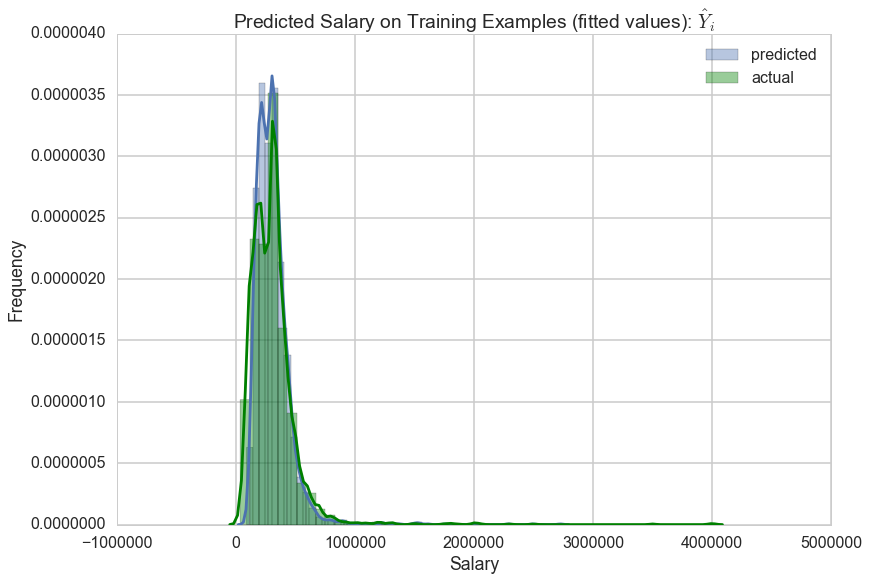

In [125]:
sns.distplot(predsTrain, label='predicted')
sns.distplot(y_train, color='g', label='actual')
plt.title('Predicted Salary on Training Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

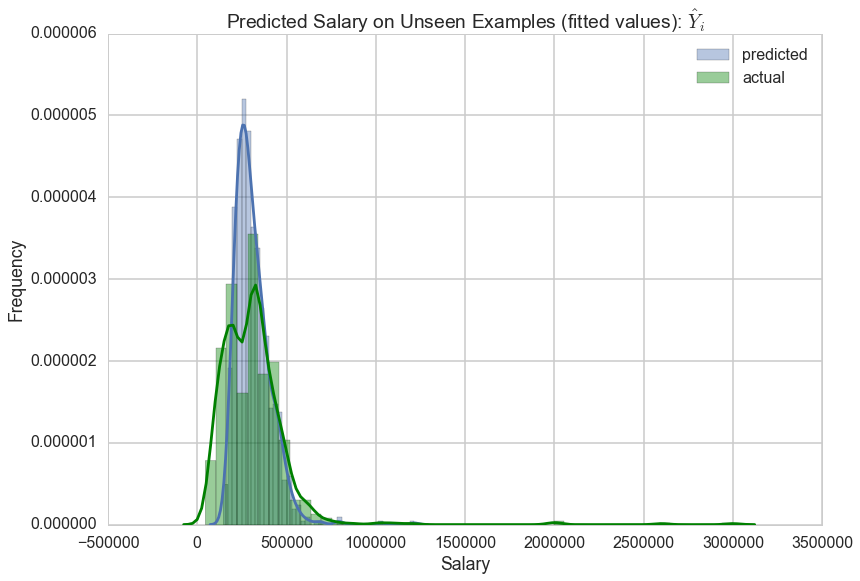

In [126]:
sns.distplot(predsTest, label='predicted')
sns.distplot(y_test, color='g', label='actual')
plt.title('Predicted Salary on Unseen Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

In [127]:
pred_comparison_train = pd.DataFrame(zip(y_train, predsTrain), columns=['actual', 'predicted'])

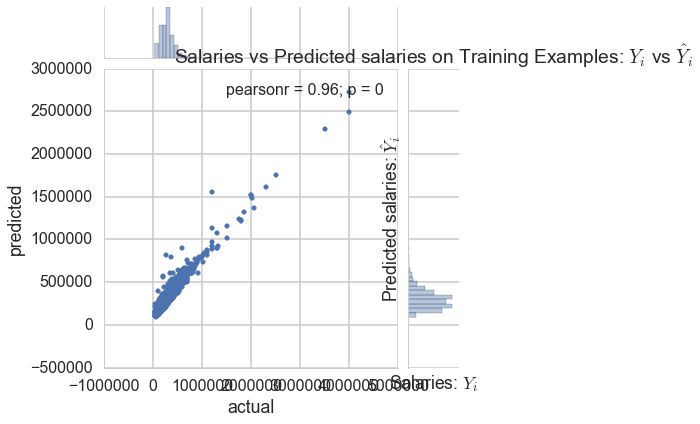

In [128]:
sns.jointplot(x='actual', y='predicted', data=pred_comparison_train)
plt.xlabel("Salaries: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted salaries on Training Examples: $Y_i$ vs $\hat{Y}_i$");

In [129]:
pred_comparison_test = pd.DataFrame(zip(y_test, predsTest), columns=['actual', 'predicted'])

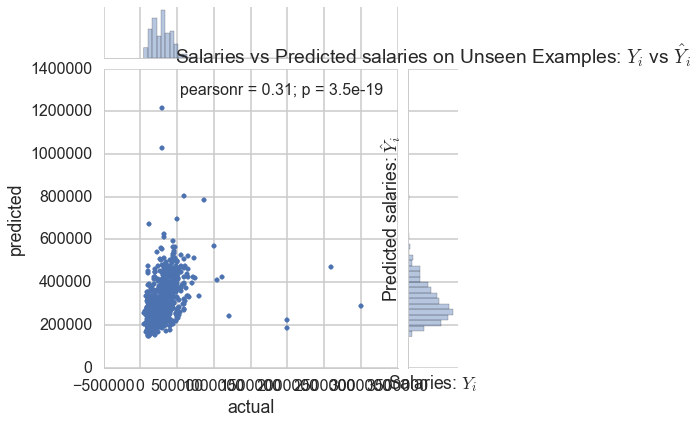

In [130]:
sns.jointplot(x='actual', y='predicted', data=pred_comparison_test)
plt.xlabel("Salaries: $Y_i$")
plt.ylabel("Predicted salaries: $\hat{Y}_i$")
plt.title("Salaries vs Predicted salaries on Unseen Examples: $Y_i$ vs $\hat{Y}_i$");

In [131]:
mseTrain = np.mean((y_train - predsTrain) ** 2)
mseTest = np.mean((y_test - predsTest) ** 2)

print 'Mean Squared Error on training examples %f ' %mseTrain
print 'Mean Squared Error on unseen examples %f ' %mseTest

Mean Squared Error on training examples 5854571431.175735 
Mean Squared Error on unseen examples 40920838060.250000 


## Gradient Boosting Machines

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
ft = FeatureTransformer(train, test)
scaler = StandardScaler()
gbr = GradientBoostingRegressor()

In [134]:
pipeline = Pipeline([('transformer', ft), ('scaler', scaler), ('gbr', gbr)])

In [135]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer', FeatureTransformer(test=None, train=None)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbr', GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False))])

In [136]:
predsTrain = pipeline.predict(X_train)
predsTest = pipeline.predict(X_test)

In [137]:
# lets take a look at first five predicted values
predsTrain[0:5]

array([ 288390.22089311,  223872.2041789 ,  264987.74658448,
        401552.71567407,  183847.95585682])

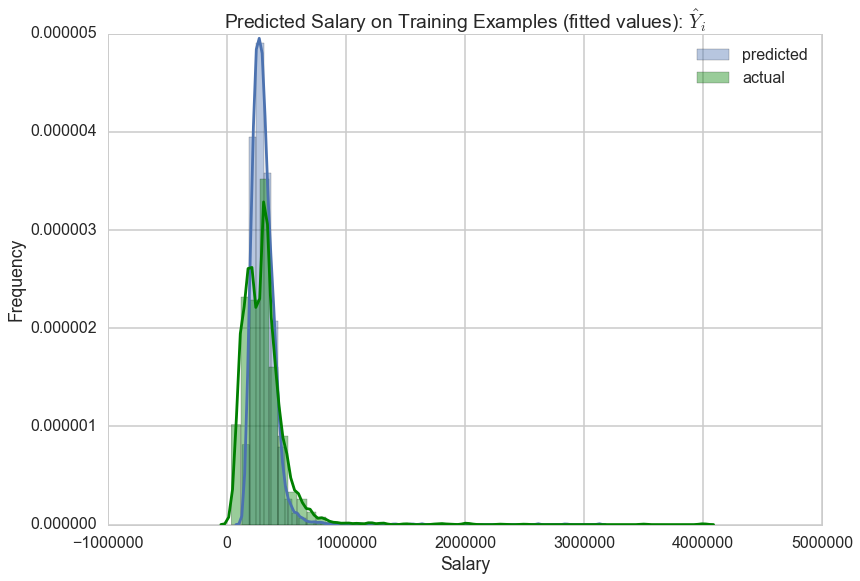

In [138]:
sns.distplot(predsTrain, label='predicted')
sns.distplot(y_train, color='g', label='actual')
plt.title('Predicted Salary on Training Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

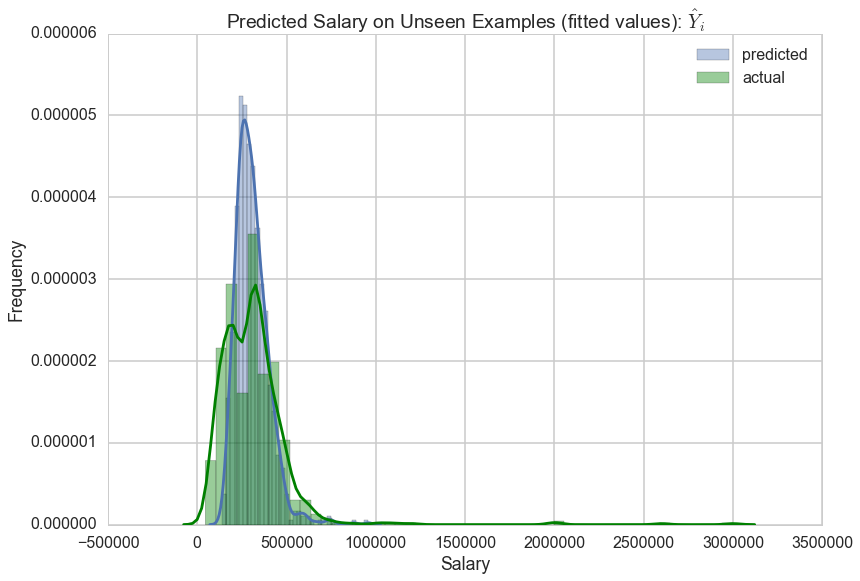

In [139]:
sns.distplot(predsTest, label='predicted')
sns.distplot(y_test, color='g', label='actual')
plt.title('Predicted Salary on Unseen Examples (fitted values): $\hat{Y}_i$')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(loc='best');

In [140]:
mseTrain = np.mean((y_train - predsTrain) ** 2)
mseTest = np.mean((y_test - predsTest) ** 2)

print 'Mean Squared Error on training examples %f ' %mseTrain
print 'Mean Squared Error on unseen examples %f ' %mseTest

Mean Squared Error on training examples 18832020265.104649 
Mean Squared Error on unseen examples 39974217455.899727 


** Till now linear regession is producing surprisingly best results and all other models have been over-predicting for most of the examples. **